In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [4]:
original_dir = pathlib.Path("ExpandedDataset/")
new_base_dir = pathlib.Path("ExpandedDataset_organized/")
content = os.listdir(original_dir)
BATCH_SIZE = 64
size_x = 256
size_y = 256

In [5]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')

Found 9280 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.


# Primer paso: extracción de características

In [37]:
xception_base = keras.applications.Xception(
    weights='imagenet', 
    include_top=False) 

inputs = keras.Input(shape=(size_x , size_y, 3))
xception_base.trainable = False

x = keras.applications.xception.preprocess_input(inputs) 
x = xception_base(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(58, activation="softmax")(x)

model6 = keras.Model(inputs, outputs)

model6.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf.math.truediv_12 (TFOpLamb (None, 256, 256, 3)       0         
_________________________________________________________________
tf.math.subtract_12 (TFOpLam (None, 256, 256, 3)       0         
_________________________________________________________________
xception (Functional)        (None, None, None, 2048)  20861480  
_________________________________________________________________
flatten_14 (Flatten)         (None, 131072)            0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 131072)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 58)                760

In [38]:
model6.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])
    
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model6/best_version",
    save_best_only=True,
    monitor="val_loss")
    ]

history = model6.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
145/145 [==============================] - 42s 272ms/step - loss: 5.4259 - accuracy: 0.6338 - val_loss: 2.5183 - val_accuracy: 0.7741
INFO:tensorflow:Assets written to: model6\best_version\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
145/145 [==============================] - 40s 269ms/step - loss: 1.1745 - accuracy: 0.8723 - val_loss: 2.4854 - val_accuracy: 0.7914
INFO:tensorflow:Assets written to: model6\best_version\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/30
145/145 [==============================] - 42s 280ms/step - loss: 0.5958 - accuracy: 0.9279 - val_loss: 2.2339 - val_accuracy: 0.8302
INFO:tensorflow:Assets written to: model6\best_version\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/30
145/145 [==============================] - 42s 279ms/step - loss: 0.3349 - accuracy: 0.9577 - val_loss: 2.0380 - val_accuracy: 0.8655
INFO:tensorflow:Assets written to: model6\best_version\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 5/30
145/145 [==============================] - 41s 274ms/step - loss: 0.2328 - accuracy: 0.9683 - val_loss: 2.1949 - val_accuracy: 0.8362
Epoch 6/30
145/145 [==============================] - 40s 273ms/step - loss: 0.1590 - accuracy: 0.9794 - val_loss: 1.8500 - val_accuracy: 0.8474
INFO:tensorflow:Assets written to: model6\best_version\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 7/30
145/145 [==============================] - 41s 277ms/step - loss: 0.1106 - accuracy: 0.9867 - val_loss: 2.2524 - val_accuracy: 0.8491
Epoch 8/30
145/145 [==============================] - 40s 271ms/step - loss: 0.0987 - accuracy: 0.9857 - val_loss: 1.6689 - val_accuracy: 0.8672
INFO:tensorflow:Assets written to: model6\best_version\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 9/30
145/145 [==============================] - 41s 277ms/step - loss: 0.0598 - accuracy: 0.9921 - val_loss: 1.8533 - val_accuracy: 0.8655
Epoch 10/30
145/145 [==============================] - 41s 275ms/step - loss: 0.0495 - accuracy: 0.9933 - val_loss: 1.3704 - val_accuracy: 0.8879
INFO:tensorflow:Assets written to: model6\best_version\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 11/30
145/145 [==============================] - 41s 278ms/step - loss: 0.0382 - accuracy: 0.9954 - val_loss: 1.5912 - val_accuracy: 0.8879
Epoch 12/30
145/145 [==============================] - 41s 273ms/step - loss: 0.0329 - accuracy: 0.9949 - val_loss: 1.5185 - val_accuracy: 0.8836
Epoch 13/30
145/145 [==============================] - 41s 273ms/step - loss: 0.0226 - accuracy: 0.9961 - val_loss: 1.6216 - val_accuracy: 0.8784
Epoch 14/30
145/145 [==============================] - 41s 273ms/step - loss: 0.0254 - accuracy: 0.9970 - val_loss: 1.5791 - val_accuracy: 0.8845
Epoch 15/30
145/145 [==============================] - 41s 273ms/step - loss: 0.0239 - accuracy: 0.9968 - val_loss: 2.0473 - val_accuracy: 0.8733
Epoch 16/30
145/145 [==============================] - 41s 274ms/step - loss: 0.0344 - accuracy: 0.9971 - val_loss: 1.8059 - val_accuracy: 0.8819
Epoch 17/30
145/145 [==============================] - 41s 274ms/step - loss: 0.0189 - accuracy: 0.9978 - val_loss: 1.7176 -

In [39]:
model6.save('model6/model')
np.save('model6/history.npy',history.history)

INFO:tensorflow:Assets written to: model6/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


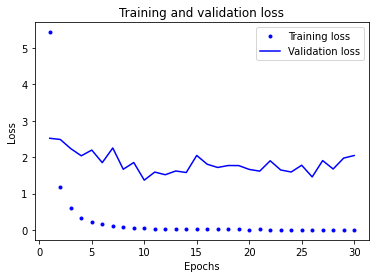

In [40]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "b.", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

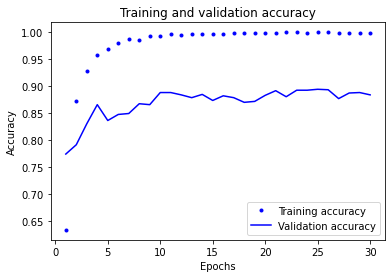

In [41]:
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, "b.", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [42]:
results= model6.evaluate(test_dataset)
results

19/19 [==============================] - 6s 248ms/step - loss: 1.6409 - accuracy: 0.8991


[1.6409173011779785, 0.8991379141807556]

In [43]:
model = keras.models.load_model('model6/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 6s 240ms/step - loss: 1.3176 - accuracy: 0.8983


[1.3176037073135376, 0.8982758522033691]

# Segundo paso: ajuste y afinamiento

In [108]:
model = keras.models.load_model('model6/best_version')

In [77]:
for layer in model.layers:
    print(layer.name)

input_30
tf.math.truediv_12
tf.math.subtract_12
xception
flatten_14
dropout_7
dense_22


In [78]:
xception = model.get_layer('xception')
for layer in xception.layers:
    print(layer.name)

input_29
block1_conv1
block1_conv1_bn
block1_conv1_act
block1_conv2
block1_conv2_bn
block1_conv2_act
block2_sepconv1
block2_sepconv1_bn
block2_sepconv2_act
block2_sepconv2
block2_sepconv2_bn
conv2d_64
block2_pool
batch_normalization_64
add_192
block3_sepconv1_act
block3_sepconv1
block3_sepconv1_bn
block3_sepconv2_act
block3_sepconv2
block3_sepconv2_bn
conv2d_65
block3_pool
batch_normalization_65
add_193
block4_sepconv1_act
block4_sepconv1
block4_sepconv1_bn
block4_sepconv2_act
block4_sepconv2
block4_sepconv2_bn
conv2d_66
block4_pool
batch_normalization_66
add_194
block5_sepconv1_act
block5_sepconv1
block5_sepconv1_bn
block5_sepconv2_act
block5_sepconv2
block5_sepconv2_bn
block5_sepconv3_act
block5_sepconv3
block5_sepconv3_bn
add_195
block6_sepconv1_act
block6_sepconv1
block6_sepconv1_bn
block6_sepconv2_act
block6_sepconv2
block6_sepconv2_bn
block6_sepconv3_act
block6_sepconv3
block6_sepconv3_bn
add_196
block7_sepconv1_act
block7_sepconv1
block7_sepconv1_bn
block7_sepconv2_act
block7_se

In [109]:
def freeze_layers(model, trainable):
    for layer in model.layers[:(len(model.layers) - trainable)]:
        layer.trainable = False

    for layer in model.layers[(len(model.layers) - trainable):]:
        if layer.name != "batch_normalization_67":
            layer.trainable = True
            print(layer.name)


In [110]:
freeze_layers(xception, 16)    
freeze_layers(model, 3)  
    
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=7e-4, momentum=0.95),
    metrics=['accuracy'])

block13_sepconv1_act
block13_sepconv1
block13_sepconv1_bn
block13_sepconv2_act
block13_sepconv2
block13_sepconv2_bn
conv2d_67
block13_pool
add_203
block14_sepconv1
block14_sepconv1_bn
block14_sepconv1_act
block14_sepconv2
block14_sepconv2_bn
block14_sepconv2_act
flatten_14
dropout_7
dense_22


In [111]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset)

Epoch 1/10
145/145 [==============================] - 53s 344ms/step - loss: 0.0070 - accuracy: 0.9991 - val_loss: 1.3567 - val_accuracy: 0.8888
Epoch 2/10
145/145 [==============================] - 51s 339ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 1.3402 - val_accuracy: 0.8888
Epoch 3/10
145/145 [==============================] - 54s 364ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 1.3507 - val_accuracy: 0.8862
Epoch 4/10
145/145 [==============================] - 52s 345ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 1.3166 - val_accuracy: 0.8871
Epoch 5/10
145/145 [==============================] - 53s 349ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 1.3178 - val_accuracy: 0.8871
Epoch 6/10
145/145 [==============================] - 51s 338ms/step - loss: 6.0532e-04 - accuracy: 0.9996 - val_loss: 1.3088 - val_accuracy: 0.8879
Epoch 7/10
145/145 [==============================] - 54s 362ms/step - loss: 8.9073e-04 - accuracy: 0.9997 - val_loss: 1.3103 

In [112]:
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 7s 297ms/step - loss: 1.1832 - accuracy: 0.9060


[1.1831868886947632, 0.9060344696044922]

In [114]:
model.save('model6/model_checkpoint')

INFO:tensorflow:Assets written to: model6/model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [115]:
model = keras.models.load_model('model6/model_checkpoint')

In [116]:
freeze_layers(xception, 8)    
freeze_layers(model, 3)  
    
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9),
    metrics=['accuracy'])

add_203
block14_sepconv1
block14_sepconv1_bn
block14_sepconv1_act
block14_sepconv2
block14_sepconv2_bn
block14_sepconv2_act
flatten_14
dropout_7
dense_22


In [117]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset)

Epoch 1/10
145/145 [==============================] - 91s 598ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 1.2996 - val_accuracy: 0.8845
Epoch 2/10
145/145 [==============================] - 86s 578ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 1.2997 - val_accuracy: 0.8845
Epoch 3/10
145/145 [==============================] - 87s 588ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 1.3006 - val_accuracy: 0.8845
Epoch 4/10
145/145 [==============================] - 88s 592ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 1.3004 - val_accuracy: 0.8845
Epoch 5/10
145/145 [==============================] - 87s 587ms/step - loss: 5.4205e-04 - accuracy: 0.9999 - val_loss: 1.3010 - val_accuracy: 0.8853
Epoch 6/10
145/145 [==============================] - 86s 583ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 1.3012 - val_accuracy: 0.8853
Epoch 7/10
145/145 [==============================] - 85s 579ms/step - loss: 3.2901e-04 - accuracy: 0.9998 - val_loss: 1.3024 

In [118]:
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 11s 479ms/step - loss: 1.1853 - accuracy: 0.9060


[1.1853069067001343, 0.9060344696044922]